# Dataset information

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

0. Pregnancies: Number of times pregnant.
1. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
2. BloodPressure: Diastolic blood pressure (mm Hg).
3. SkinThickness: Triceps skinfold thickness (mm).
4. Insulin: 2-Hour serum insulin (mu U/ml).
5. BMI: Body mass index (weight in kg/(height in m)^2).
6. DiabetesPedigreeFunction: Diabetes pedigree function.
7. Age (years).
8. Outcome: Class variable (0 or 1).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()   #No Null Data

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Exploratory Data Analysis & Outliers

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

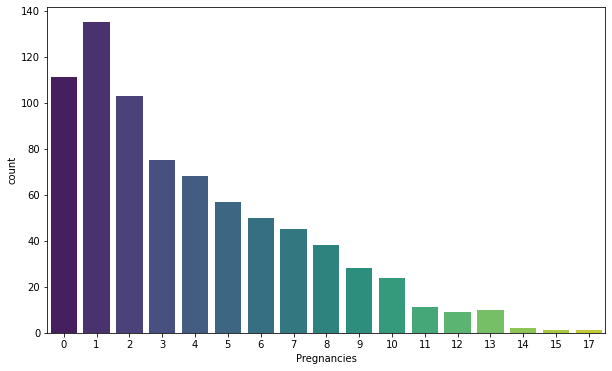

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pregnancies', data=df, palette='viridis')

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

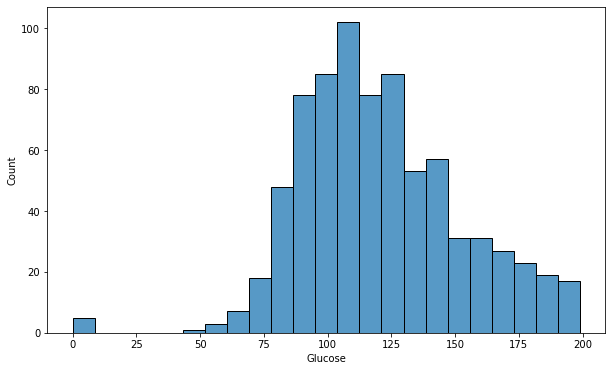

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(x='Glucose', data=df)

In [9]:
len(df)

768

In [10]:
100 * len(df[df['Glucose']==0])/len(df) #Let to Remove These Outliers

0.6510416666666666

In [11]:
df = df[df['Glucose']!=0]   #Glucose cannot be zero we remove these data, looks they are outliers

In [12]:
len(df)

763

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

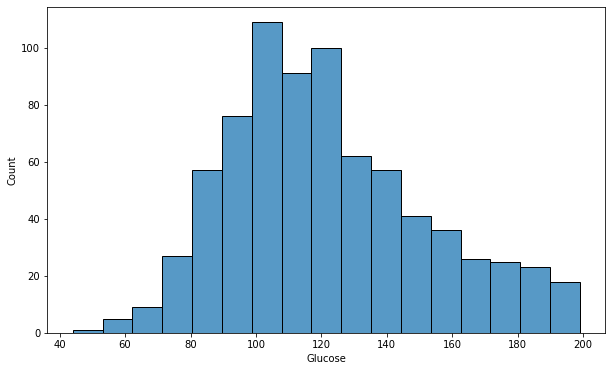

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(x='Glucose', data=df)

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

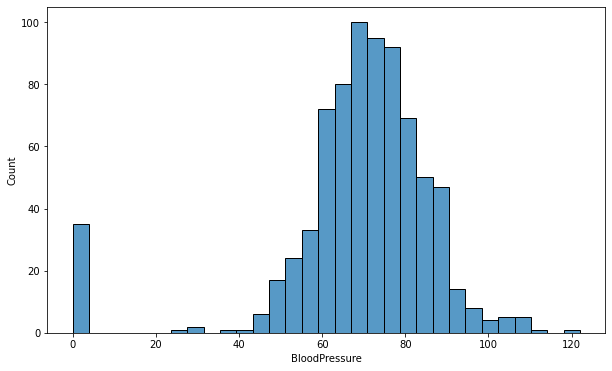

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(x='BloodPressure', data=df)

In [15]:
100 * len(df[df['BloodPressure']==0])/len(df)

4.587155963302752

In [16]:
df = df[df['BloodPressure']!=0]    # Blood pressure cannot be zero, looks zero values for blood pressure are not logical.

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

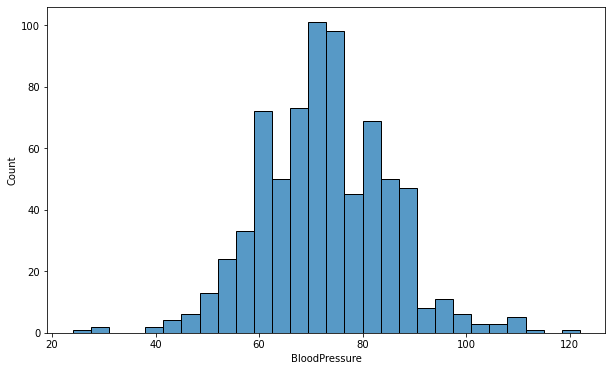

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(x='BloodPressure', data=df)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

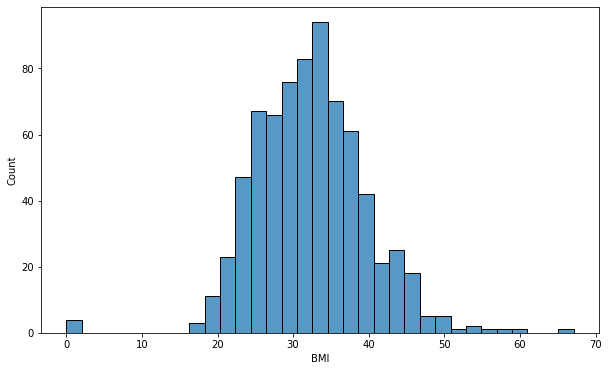

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(x='BMI', data=df)

In [19]:
100 * len(df[df['BMI']==0])/len(df)

0.5494505494505495

In [20]:
df = df[df['BMI']!=0]

In [21]:
len(df)

724

<AxesSubplot:xlabel='Age', ylabel='Count'>

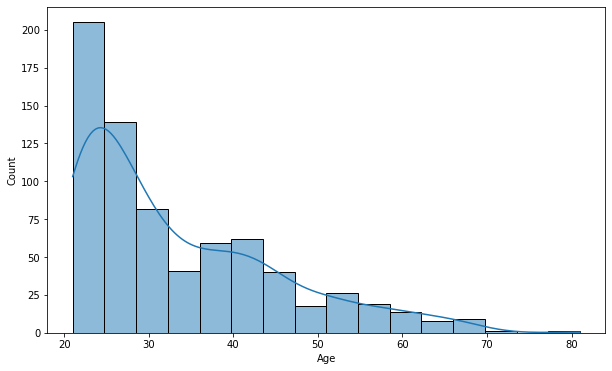

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(x='Age', data=df, kde=True)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

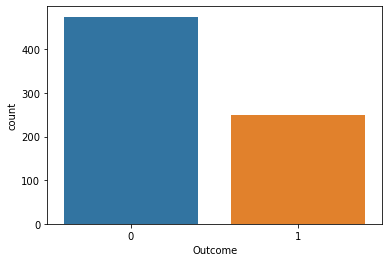

In [23]:
sns.countplot(x='Outcome', data=df)  # Data is almost Balanced.

In [24]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

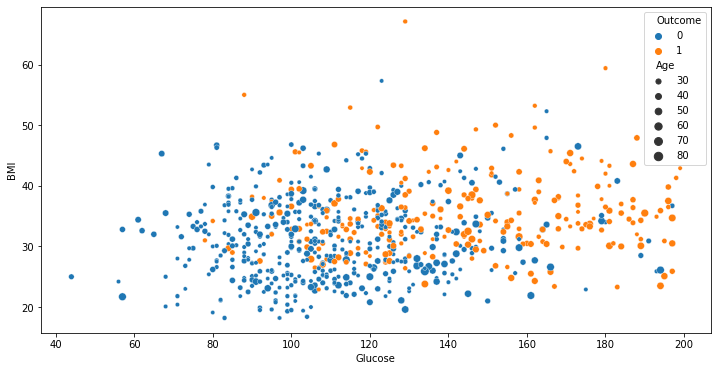

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Glucose', y='BMI', data=df, hue='Outcome', size='Age')

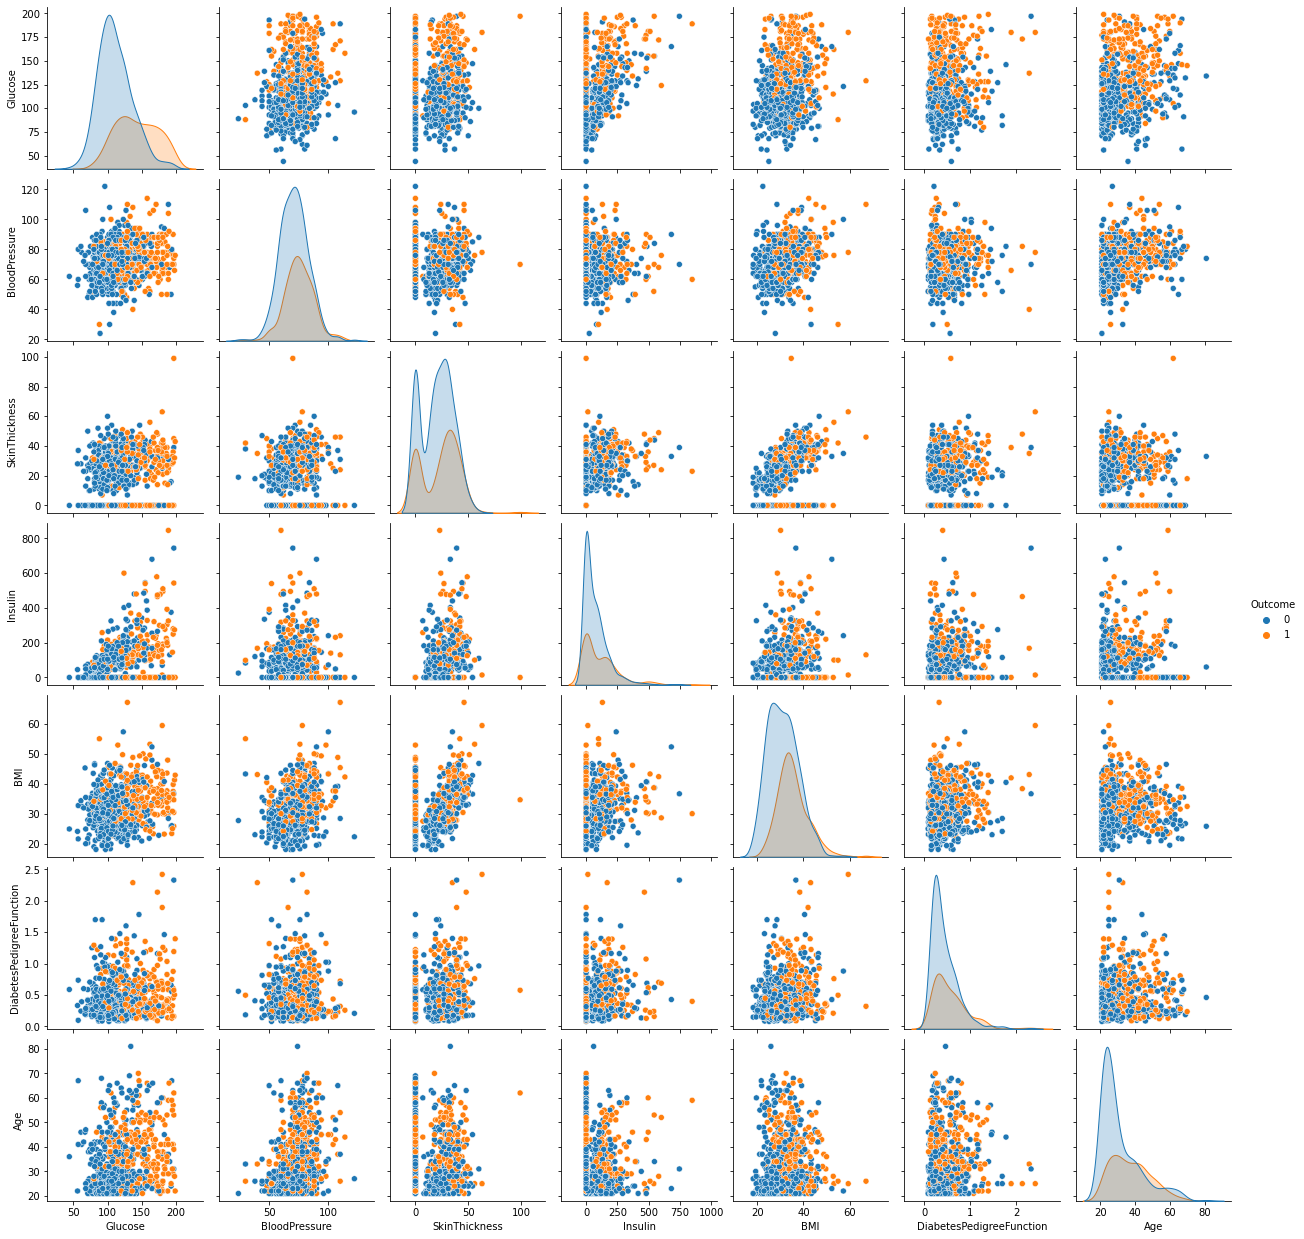

In [26]:
sns.pairplot(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']],
             hue='Outcome', data=df)

<AxesSubplot:>

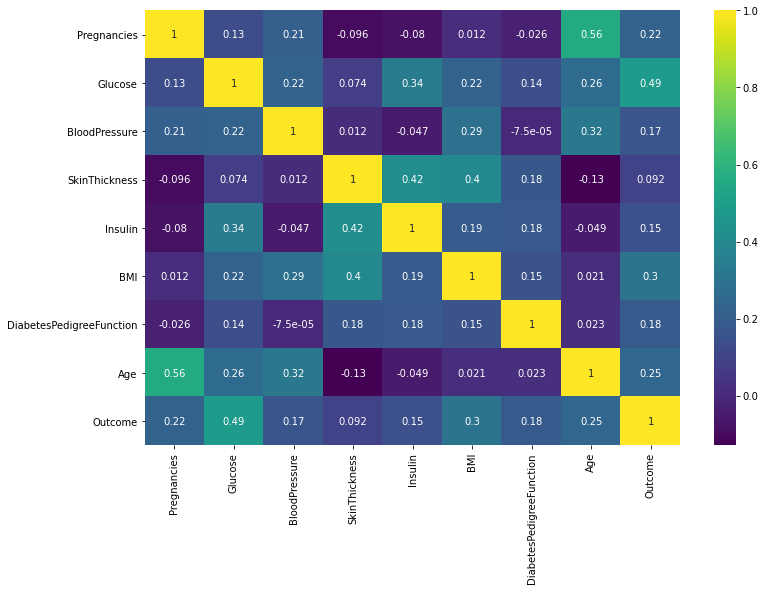

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

# Data Preparation

In [28]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [31]:
X_test, X_hold, y_test, y_hold = train_test_split(X_test, y_test, test_size=0.50, random_state=101)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
scaled_X_train = scaler.fit_transform(X_train)

In [35]:
scaled_X_test = scaler.transform(X_test)
scaled_X_hold = scaler.transform(X_hold)

# Model Training

## LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [37]:
model = LogisticRegression(max_iter=1000000000, class_weight='balanced')

In [38]:
penalty = ['l1', 'l2', 'elasticnet']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
c = [0.0001, 0.001, 0.01, 0.1, 0.4, 0.8, 1, 5]

In [39]:
param_grid = {'penalty':penalty, 'C':c, 'solver':solver}

In [40]:
lr_grid = GridSearchCV(model, param_grid=param_grid)

In [41]:
lr_grid.fit(scaled_X_train, y_train)

C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_

C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_

C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_

C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_

C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_

C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_

C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_

C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sajja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sajja\anaconda3\lib\site-packages\sklearn\model_

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000000000),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.4, 0.8, 1, 5],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [42]:
lr_grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [43]:
y_preds = lr_grid.predict(scaled_X_test)

In [44]:
y_preds

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1],
      dtype=int64)

In [45]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [46]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        72
           1       0.64      0.76      0.69        37

    accuracy                           0.77       109
   macro avg       0.75      0.77      0.75       109
weighted avg       0.79      0.77      0.77       109



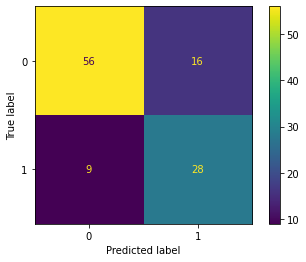

In [47]:
plot_confusion_matrix(lr_grid, scaled_X_test, y_test)

## SVM Model

In [48]:
from sklearn.svm import SVC

In [49]:
svc = SVC()   

In [50]:
C = [0.001, 0.01, 0.1, 0.2, 0.5, 1]
kernel = ['rbf', 'sigmoid', 'poly', 'linear']
gamma = ['scale', 'auto']
degree = [1,2,3,4,5]

In [51]:
param_grid = {'C':C, 'kernel':kernel, 'gamma':gamma,
             'degree':degree}

In [52]:
grid_model = GridSearchCV(svc, param_grid)

In [53]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.5, 1],
                         'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid', 'poly', 'linear']})

In [54]:
grid_model.best_params_

{'C': 0.5, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}

In [55]:
svc_preds = grid_model.predict(scaled_X_test)

In [56]:
print(classification_report(y_test, svc_preds))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        72
           1       0.69      0.59      0.64        37

    accuracy                           0.77       109
   macro avg       0.75      0.73      0.73       109
weighted avg       0.77      0.77      0.77       109



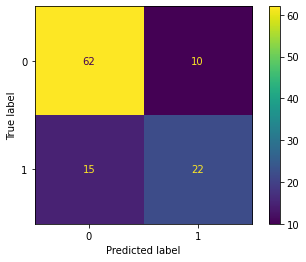

In [57]:
plot_confusion_matrix(grid_model, scaled_X_test, y_test)   

In [58]:
#Logistic regression is better than this model. This model has more false positive 
#(1 is negative: having diabetes is negative!)

# Tree models

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
tree = DecisionTreeClassifier()

In [61]:
tree.fit(scaled_X_train, y_train)

DecisionTreeClassifier()

In [62]:
tree_preds = tree.predict(scaled_X_test)

In [63]:
print(classification_report(y_test, tree_preds))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        72
           1       0.66      0.62      0.64        37

    accuracy                           0.76       109
   macro avg       0.73      0.73      0.73       109
weighted avg       0.76      0.76      0.76       109



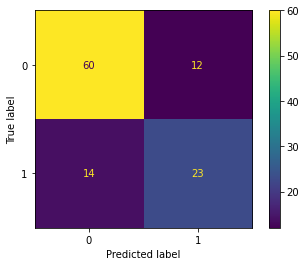

In [64]:
plot_confusion_matrix(tree, scaled_X_test, y_test)

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
gbc = GradientBoostingClassifier()

In [67]:
learning_rate = [0.001, 0.01, 0.1, 0.4, 0.8, 1]
n_estimators = [60, 80, 100, 120, 140]

In [68]:
param_grid = {'learning_rate':learning_rate, 'n_estimators':n_estimators}

In [69]:
gbc_grid = GridSearchCV(gbc, param_grid)

In [70]:
gbc_grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.4, 0.8, 1],
                         'n_estimators': [60, 80, 100, 120, 140]})

In [71]:
gbc_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 60}

In [72]:
gbc_pred = gbc_grid.predict(scaled_X_test)

In [73]:
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        72
           1       0.62      0.65      0.63        37

    accuracy                           0.74       109
   macro avg       0.71      0.72      0.72       109
weighted avg       0.75      0.74      0.74       109



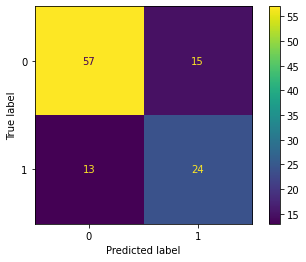

In [74]:
plot_confusion_matrix(gbc_grid, scaled_X_test, y_test)

In [75]:
# Logistic Regression is the best one, we use it for model deployment. we check the a

# Model Selection

In [76]:
final_predict = lr_grid.predict(scaled_X_hold)

In [77]:
print(classification_report(y_hold, final_predict))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        74
           1       0.62      0.71      0.67        35

    accuracy                           0.77       109
   macro avg       0.74      0.76      0.75       109
weighted avg       0.78      0.77      0.77       109



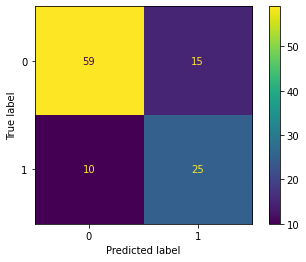

In [78]:
plot_confusion_matrix(lr_grid, scaled_X_hold, y_hold)

# Model Deployment

In [79]:
scaled_X = scaler.fit_transform(X)

In [80]:
final_model = LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [81]:
final_model.fit(scaled_X, y)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [82]:
import joblib

In [83]:
joblib.dump(final_model,'final_model.pkl')

['final_model.pkl']

In [84]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [85]:
joblib.dump(list(X.columns),'column_names.pkl')

['column_names.pkl']